In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
from nltk import word_tokenize
import warnings 

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

file = pd.read_csv(r'C:\Users\xuanx\df_20.csv')
print(file)

        Unnamed: 0  Unnamed: 0.1  app_id                     app_name  \
0         10765690      10765692  960090                  Bloons TD 6   
1         10133906      10133908  252950                Rocket League   
2          8678824       8678825   48700       Mount & Blade: Warband   
3          2277862       2277863  289070  Sid Meier's Civilization VI   
4          1086924       1086925    4000                  Garry's Mod   
...            ...           ...     ...                          ...   
192704     1663303       1663304    8930   Sid Meier's Civilization V   
192705    16666753      16666757  346110        ARK: Survival Evolved   
192706     5115278       5115279  814380   Sekiro™: Shadows Die Twice   
192707    21118240      21118245  236850        Europa Universalis IV   
192708     3977686       3977687  581320        Insurgency: Sandstorm   

        review_id language                                             review  \
0        57959947  english                

In [4]:
file['language'].value_counts()

english    192709
Name: language, dtype: int64

In [5]:
df = file[file['language']== 'english']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192709 entries, 0 to 192708
Data columns (total 24 columns):
Unnamed: 0                        192709 non-null int64
Unnamed: 0.1                      192709 non-null int64
app_id                            192709 non-null int64
app_name                          192709 non-null object
review_id                         192709 non-null int64
language                          192709 non-null object
review                            192366 non-null object
timestamp_created                 192709 non-null int64
timestamp_updated                 192709 non-null int64
recommended                       192709 non-null bool
votes_helpful                     192709 non-null int64
votes_funny                       192709 non-null int64
weighted_vote_score               192709 non-null float64
comment_count                     192709 non-null int64
steam_purchase                    192709 non-null bool
received_for_free                 192709 non-n

In [6]:
df['recommended'].value_counts()

True     171510
False     21199
Name: recommended, dtype: int64

In [7]:
df['received_for_free'].value_counts()

False    187190
True       5519
Name: received_for_free, dtype: int64

In [8]:
print(df)

        Unnamed: 0  Unnamed: 0.1  app_id                     app_name  \
0         10765690      10765692  960090                  Bloons TD 6   
1         10133906      10133908  252950                Rocket League   
2          8678824       8678825   48700       Mount & Blade: Warband   
3          2277862       2277863  289070  Sid Meier's Civilization VI   
4          1086924       1086925    4000                  Garry's Mod   
...            ...           ...     ...                          ...   
192704     1663303       1663304    8930   Sid Meier's Civilization V   
192705    16666753      16666757  346110        ARK: Survival Evolved   
192706     5115278       5115279  814380   Sekiro™: Shadows Die Twice   
192707    21118240      21118245  236850        Europa Universalis IV   
192708     3977686       3977687  581320        Insurgency: Sandstorm   

        review_id language                                             review  \
0        57959947  english                

In [9]:
#Checking review column for null values and removing them.
df.review.isnull().sum()
df1 = df[df.review.isnull()== False]

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#Convert text to lowercase and removing punctuation 

def remove_punct(txt):
    text_input = "".join([char for char in txt if char not in string.punctuation])
    return text_input

df1['token_review'] = df1['review'].apply(lambda x: remove_punct(x.lower()))

In [12]:
print(df1)

        Unnamed: 0  Unnamed: 0.1  app_id                     app_name  \
0         10765690      10765692  960090                  Bloons TD 6   
1         10133906      10133908  252950                Rocket League   
2          8678824       8678825   48700       Mount & Blade: Warband   
3          2277862       2277863  289070  Sid Meier's Civilization VI   
4          1086924       1086925    4000                  Garry's Mod   
...            ...           ...     ...                          ...   
192704     1663303       1663304    8930   Sid Meier's Civilization V   
192705    16666753      16666757  346110        ARK: Survival Evolved   
192706     5115278       5115279  814380   Sekiro™: Shadows Die Twice   
192707    21118240      21118245  236850        Europa Universalis IV   
192708     3977686       3977687  581320        Insurgency: Sandstorm   

        review_id language                                             review  \
0        57959947  english                

In [13]:
#Convert reviews into tokens
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df1['token_review1'] = df1['token_review'].apply(lambda x: tokenize(x))

In [14]:
#nltk.download('stopwords')

In [15]:
#remove stopwords

stopword = nltk.corpus.stopwords.words('english')

def rem_stopwords(txt):
    text = [word for word in txt if word not in stopword]
    return text

df1['token_review2'] = df1['token_review1'].apply(lambda x: rem_stopwords(x))
    

In [16]:
#convert words to base form 
wn = nltk.WordNetLemmatizer()

def lemmatizer(txt):
    text = [wn.lemmatize(word) for word in txt]
    return text

df1['token_review3']=df1['token_review2'].apply(lambda x: lemmatizer(x))

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xuanx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df1['rec_var'] = df1['recommended'].apply(lambda x: int(x))

In [19]:
pos_reviews = df1[df1['rec_var'] == 1]
neg_reviews = df1[df1['rec_var'] == 0]

In [20]:
from nltk.probability import FreqDist

allreviews = df1['token_review3']
allwords = []
for reviews in allreviews:
    allwords += reviews


In [21]:
freqdist = FreqDist(allwords)
freqdist

FreqDist({'game': 225406, 'good': 41096, 'like': 38720, 'fun': 38162, 'play': 34325, 'get': 32101, 'time': 28884, 'great': 28308, 'one': 27812, 'really': 23084, ...})

In [22]:
pos_rev_words = pos_reviews['token_review3']
pos_words = []
for reviews in pos_rev_words:
    pos_words += reviews
    
freqdist_pos = FreqDist(pos_words)

In [23]:
neg_rev_words = neg_reviews['token_review3']
neg_words = []
for reviews in neg_rev_words:
    neg_words += reviews
    
freqdist_neg = FreqDist(neg_words)

<function matplotlib.pyplot.show(*args, **kw)>

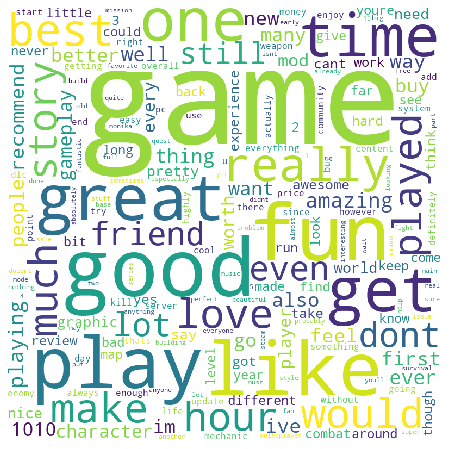

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_pos)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

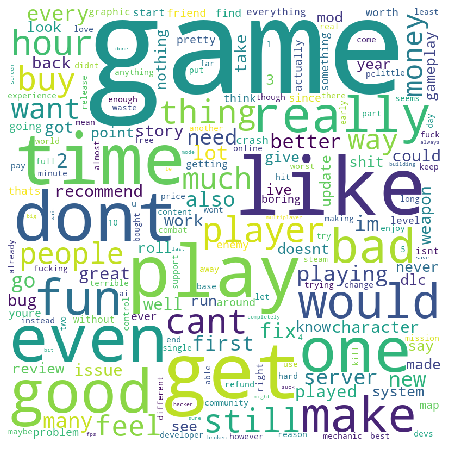

In [25]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_neg)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show


In [26]:
df1['reviews_fin'] = df1['token_review3'].apply(lambda x: ' '.join(x))

In [27]:
df1.head

<bound method NDFrame.head of         Unnamed: 0  Unnamed: 0.1  app_id                     app_name  \
0         10765690      10765692  960090                  Bloons TD 6   
1         10133906      10133908  252950                Rocket League   
2          8678824       8678825   48700       Mount & Blade: Warband   
3          2277862       2277863  289070  Sid Meier's Civilization VI   
4          1086924       1086925    4000                  Garry's Mod   
...            ...           ...     ...                          ...   
192704     1663303       1663304    8930   Sid Meier's Civilization V   
192705    16666753      16666757  346110        ARK: Survival Evolved   
192706     5115278       5115279  814380   Sekiro™: Shadows Die Twice   
192707    21118240      21118245  236850        Europa Universalis IV   
192708     3977686       3977687  581320        Insurgency: Sandstorm   

        review_id language                                             review  \
0        579

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
from sklearn.model_selection import train_test_split

df_x = df1['reviews_fin']
y = df1['rec_var']
X_train, X_test, y_train, y_test = train_test_split(df_x, y , 
                                                    test_size = 0.2, 
                                                    random_state = 42)


In [30]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_features.shape, test_vectors.shape)

(153892, 104692) (38474, 104692)


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB().fit(train_features, y_train)

In [32]:
predicted = clf.predict(test_vectors)

print('Unigram Accuracy:', accuracy_score(y_test, predicted))


Unigram Accuracy: 0.8897957061911941


In [33]:
#bigram bag of words positive reviews

(pd.Series(nltk.ngrams(pos_words, 2)).value_counts())[:10]

(good, game)     9417
(great, game)    9234
(best, game)     5851
(fun, game)      5066
(game, ever)     4484
(one, best)      4428
(love, game)     4168
(game, play)     3839
(game, good)     3737
(game, great)    3256
dtype: int64

In [34]:
#bigram bag of words negative reviews

(pd.Series(nltk.ngrams(neg_words, 2)).value_counts())[:10]

(roll, roll)         1584
(feel, like)         1057
(play, game)         1056
(bad, bad)            856
(buy, game)           778
(dont, buy)           677
(recommend, game)     664
(fix, weapon)         616
(weapon, fix)         615
(good, game)          592
dtype: int64

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from time import time
from pprint import pprint
import logging

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

pipe_multi = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', MultinomialNB())])

pipe_rf = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', RandomForestClassifier(random_state = 42))])


grid_params_multi = {'vect__ngram_range': [(1,1), (2,2), (3,3)]
                     }

grid_params_rf = {'vect__ngram_range': [(1,1), (2,2), (3,3)],
                  'clf__max_depth': [10, 20, 50, 100],
                  'clf__n_estimators': [200, 400, 600, 800]
                     }

multiNB = GridSearchCV(estimator = pipe_multi,
                      param_grid = grid_params_multi,
                      scoring = 'accuracy',
                      cv = 5, 
                       n_jobs = -1)

rf = GridSearchCV(estimator = pipe_rf,
                  param_grid = grid_params_rf,
                  scoring = 'accuracy',
                  cv = 5, 
                  n_jobs = -1)

grids = [multiNB, rf]

grid_dict = {0: 'Naive Bayes',
            1: 'Random Forest'}

print('Performing Model Optimizations')
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing Model Optimizations

Estimator: Naive Bayes
Best params are : {'vect__ngram_range': (1, 1)}
Best training accuracy: 0.891
Test set accuracy score for best params: 0.890 

Estimator: Random Forest
